In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data inspection

In [4]:
df.shape


(200, 4)

In [5]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


# Data Cleaning

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

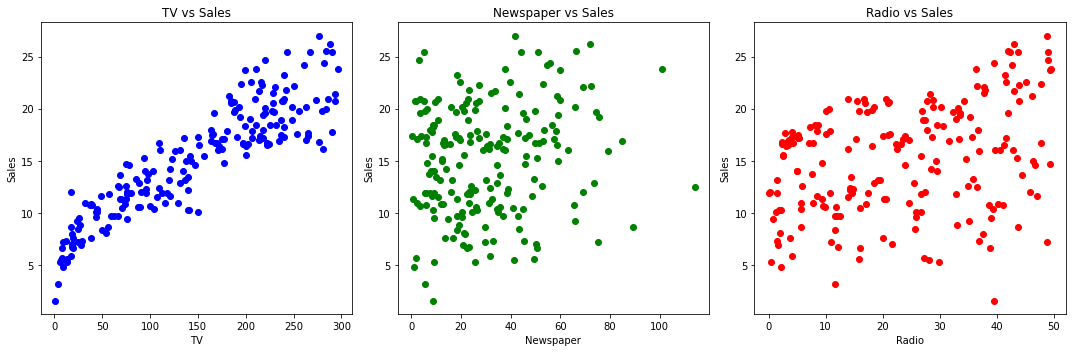

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(df['Newspaper'], df['Sales'], color='green')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
plt.scatter(df['Radio'], df['Sales'], color='red')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [11]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size= 0.7,test_size= 0.3, random_state= 100)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()


In [18]:
lr.fit(x_train, y_train)


LinearRegression()

In [19]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


Intercept: 4.334595861728435
Coefficients: [0.05382911 0.11001224 0.00628995]


In [21]:
y_pred = lr.predict(x_test)
y_pred

array([ 9.35221067, 20.96344625, 16.48851064, 20.10971005, 21.67148354,
       16.16054424, 13.5618056 , 15.39338129, 20.81980757, 21.00537077,
       12.29451311, 20.70848608,  8.17367308, 16.82471534, 10.48954832,
        9.99530649, 16.34698901, 14.5758119 , 17.23065133, 12.56890735,
       18.55715915, 12.12402775, 20.43312609, 17.78017811, 16.73623408,
       21.60387629, 20.13532087, 10.82559967, 19.12782848, 14.84537816,
       13.13597397,  9.07757918, 12.07834143, 16.62824427,  8.41792841,
       14.0456697 ,  9.92050209, 14.26101605, 16.76262961, 17.17185467,
       18.88797595, 15.50165469, 15.78688377, 16.86266686, 13.03405813,
       10.47673934, 10.6141644 , 20.85264977, 10.1517568 ,  6.88471443,
       17.88702583, 18.16013938, 12.55907083, 16.28189561, 18.98024679,
       11.33714913,  5.91026916, 10.06159509, 17.62383031, 13.19628335])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.6360765623280655
R-squared: 0.8655979373420272


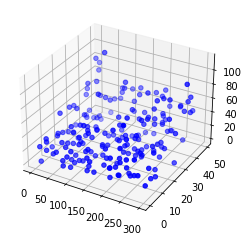

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d', label = 'Data Points')
ax.scatter (df['TV'], df['Radio'],df['Newspaper'], color = 'blue')